In [1]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import FastICA, PCA

In [2]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
                          21,11,2,3)

In [3]:
df= sago.get_aligned_signal_componets()

x range: 4.0 222.0


In [4]:
df.columns[:4]

MultiIndex([(1001,   'Raw_101'),
            (1001,    'Sg_101'),
            (1001, 'resid_101'),
            (1001,   'rms_101')],
           )

In [ ]:
def vector_max_crosscorr(v1,v2):
    

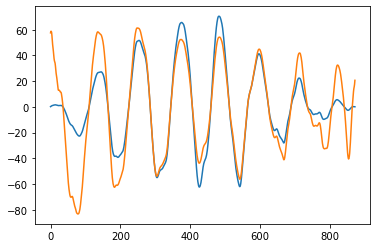

In [12]:
a = np.correlate(df[(1001,'Sg_101')],df[(1001,'Sg_102')],'full')
b = np.correlate(np.ones(437),np.ones(437),'full')
plt.plot(a)
plt.plot(a/b*300)

[]

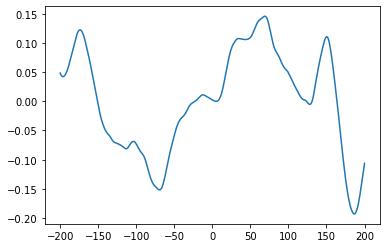

In [22]:
a = np.correlate(df[(1008,'Sg_122')],df[(1004,'Sg_110')],'full')
b = np.correlate(np.ones(437),np.ones(437),'full')
x = np.arange(-436,437)
t = np.abs(x)<=200
plt.plot(x[t],(a/b)[t])
plt.plot()

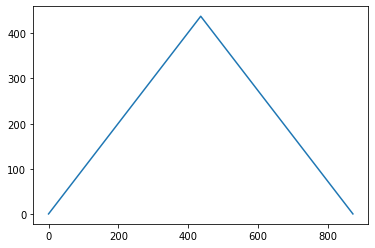

In [9]:

plt.plot(np.correlate(np.ones(437),np.ones(437),'full'))

In [20]:
df[1008].columns

Index(['Raw_122', 'Sg_122', 'resid_122', 'rms_122', 'rmso_122', 'Raw_123',
       'Sg_123', 'resid_123', 'rms_123', 'rmso_123', 'Raw_124', 'Sg_124',
       'resid_124', 'rms_124', 'rmso_124'],
      dtype='object')

In [127]:
def plot_crosscorr(df, signal_type="Sg_", enum_start=0, graphs_per_pane=3, 
                   number_panes=3 ,window=100, same=False, ylim=None):
    cols = [col for col in df.columns if col[1].startswith(signal_type)]
    combs = []
    n = len(df)
    b = np.correlate(np.ones(n),np.ones(n),'full')
    x = np.arange(-n+1,n)
    t = np.abs(x)<=window
    plt.figure(figsize=(8,number_panes*6))       
    for i in range(len(cols)):
        for j in range(i+1,len(cols)):
            if (cols[i][0] == cols[j][0]) == same: 
                combs.append((cols[i],cols[j]))
    
    for pane in range(number_panes):
        plt.subplot(number_panes,1,pane+1)
        lgnd=[]
        point = []
        for gr in range(graphs_per_pane):
            current_comb = combs[enum_start+pane*graphs_per_pane+gr]
            y = np.correlate(zscore(df[current_comb[0]]),zscore(df[current_comb[1]]),'full')
            y /= b
            lgnd.append("{}, {}".format(*current_comb))
            point.append(y[x==0])
            plt.plot(x[t],y[t])
            
            if ylim is not None:
                plt.ylim(ylim)
        plt.legend(lgnd)
        for p in point:
            plt.plot([0],[p],'+',color=(0.4,0.4,0.4))
        

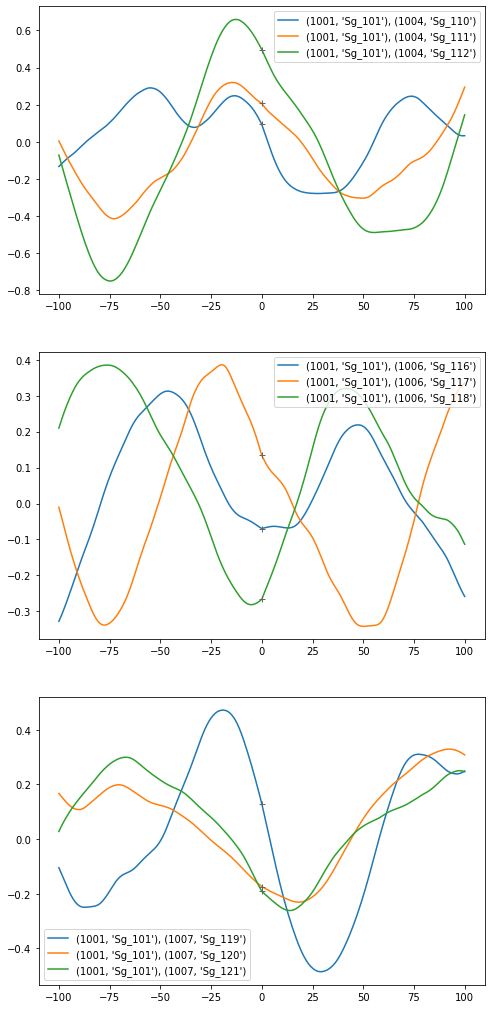

In [155]:
plot_crosscorr(df)

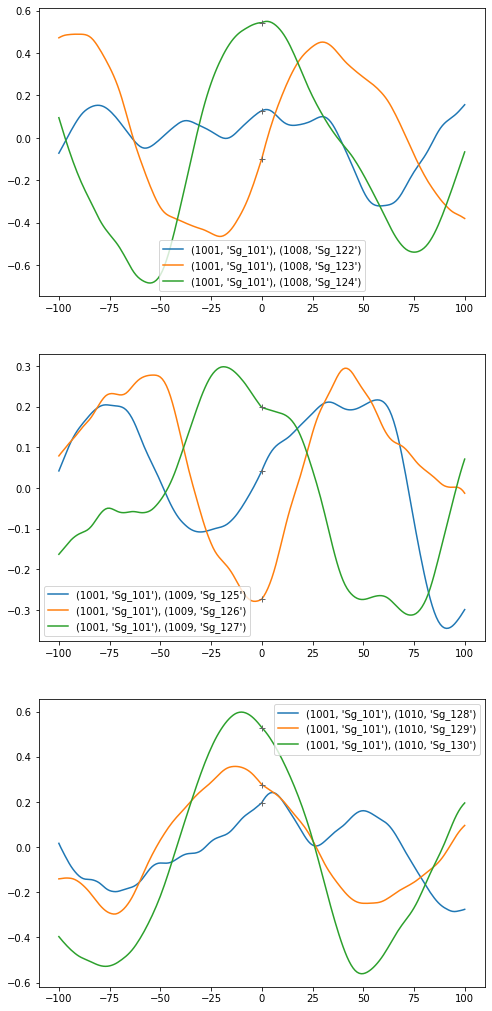

In [159]:
plot_crosscorr(df, enum_start=9)

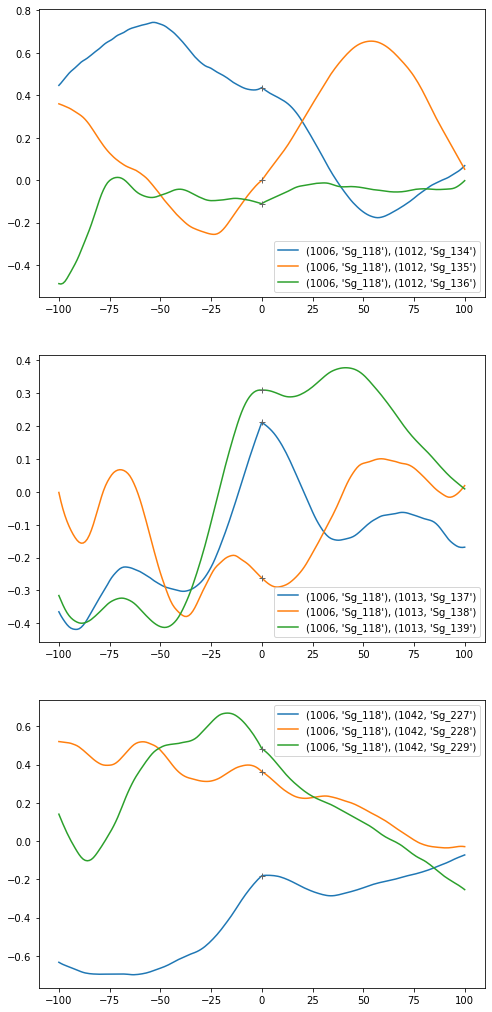

In [156]:
plot_crosscorr(df,enum_start=450)

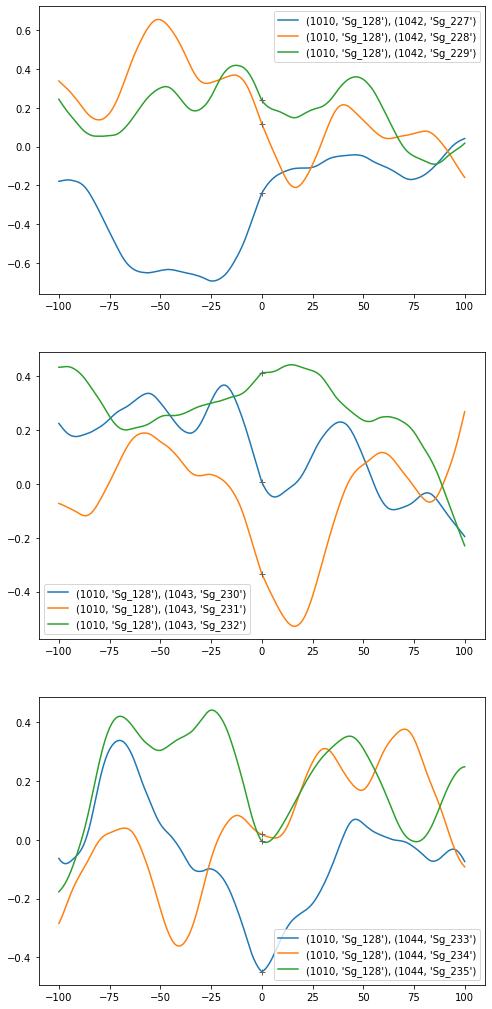

In [157]:
plot_crosscorr(df,enum_start=900)

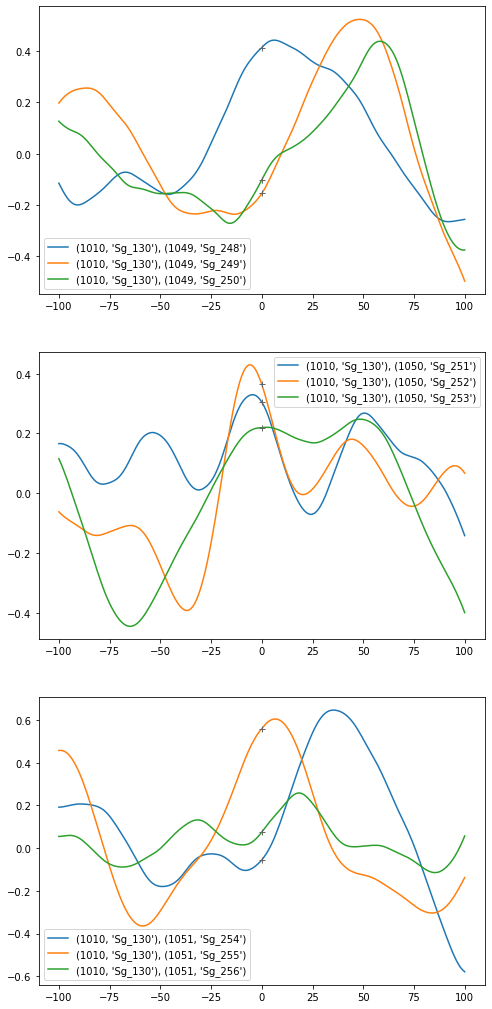

In [158]:
plot_crosscorr(df,enum_start=999)

##  Same group

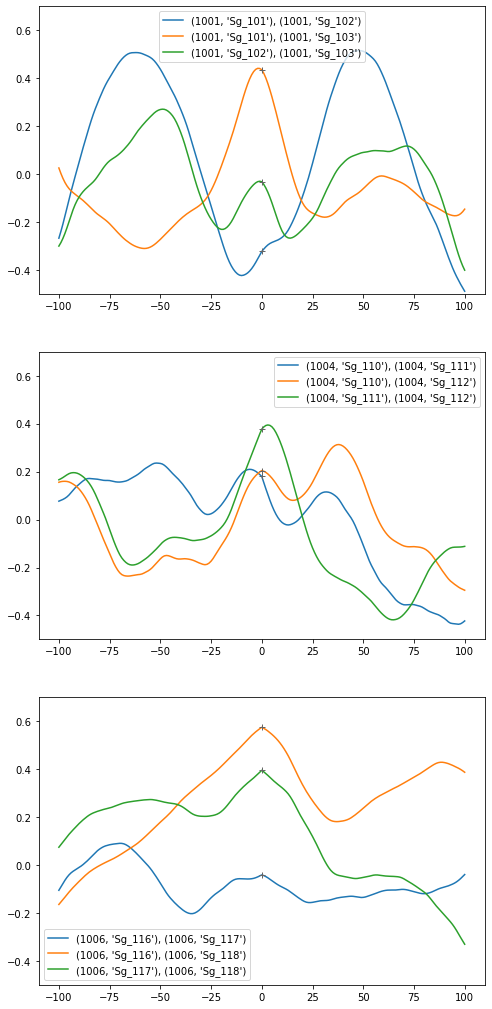

In [129]:
plot_crosscorr(df,signal_type="Sg_",same=True, ylim=[-.5, .7])

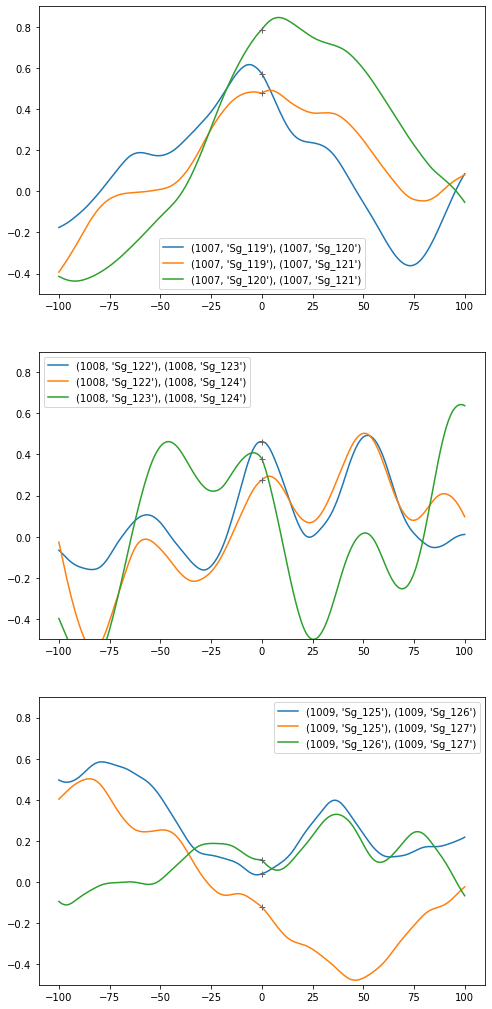

In [131]:
plot_crosscorr(df,signal_type="Sg_",enum_start=9, same=True, ylim=[-.5, .9]) 

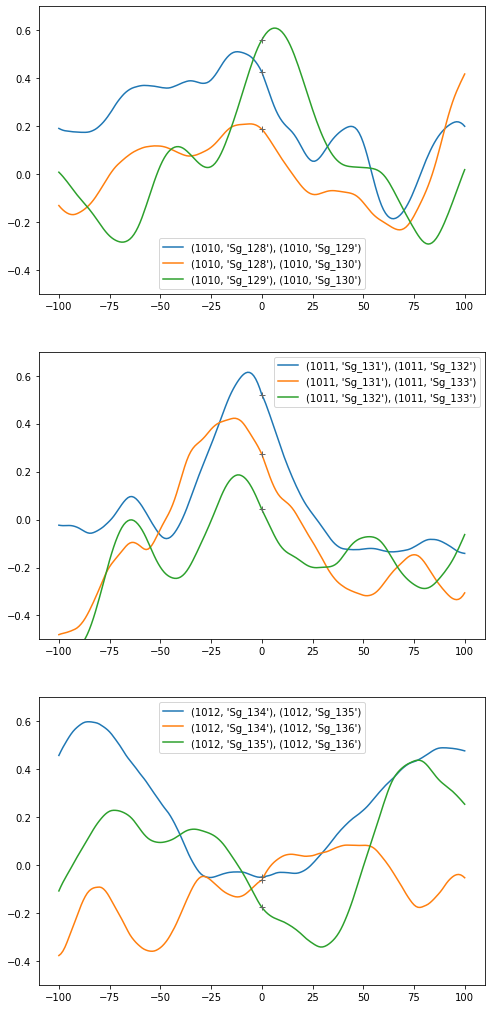

In [132]:
plot_crosscorr(df,signal_type="Sg_",enum_start=18, same=True, ylim=[-.5, .7]) 

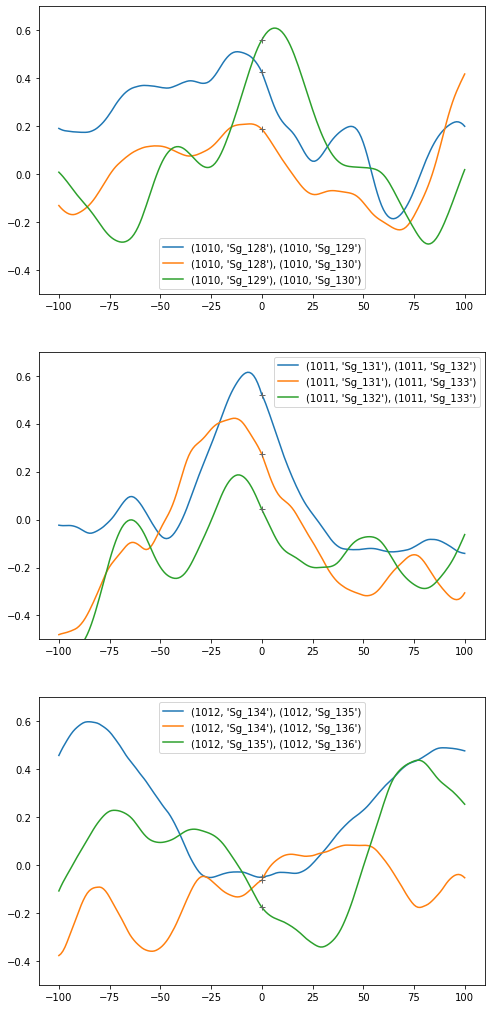

In [133]:
plot_crosscorr(df,signal_type="Sg_",enum_start=18, same=True, ylim=[-.5, .7]) 

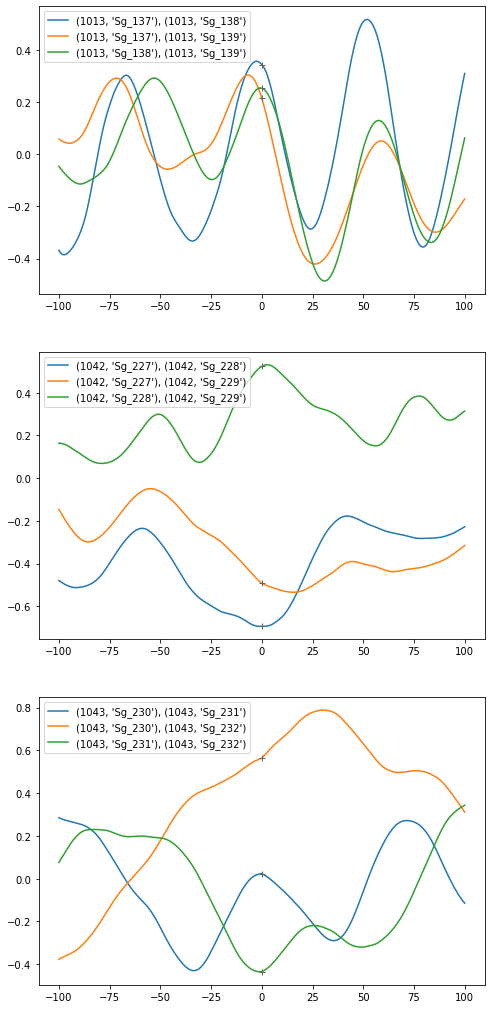

In [134]:
plot_crosscorr(df,signal_type="Sg_",enum_start=27, same=True) 

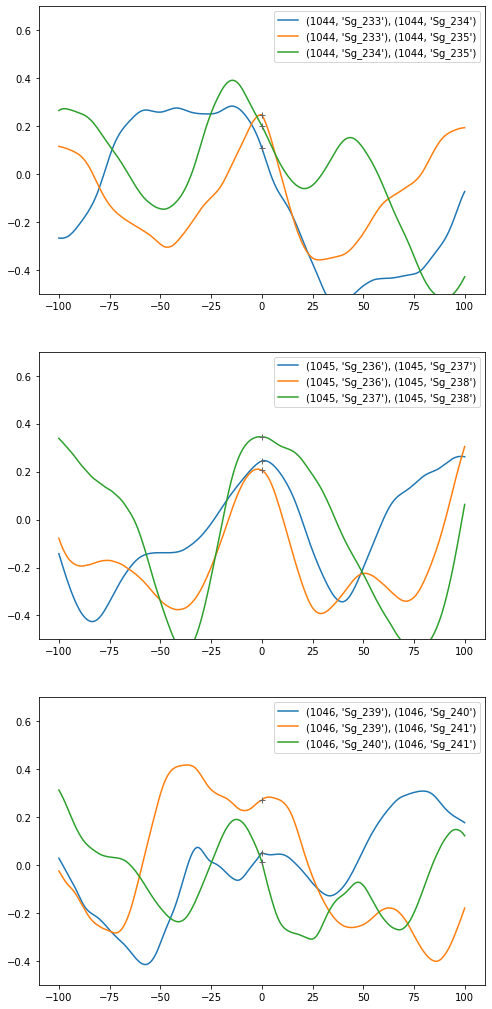

In [135]:
plot_crosscorr(df,signal_type="Sg_",enum_start=36, same=True, ylim=[-.5, .7]) 

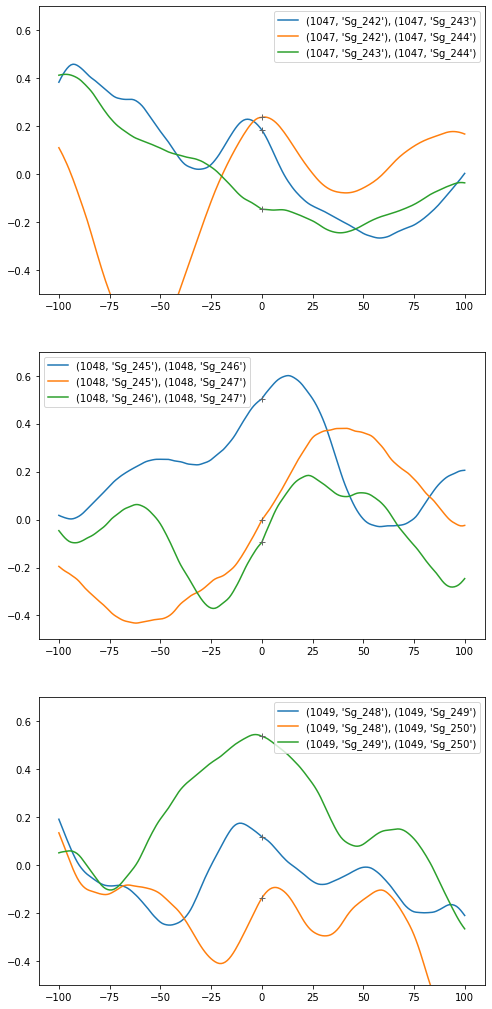

In [136]:
plot_crosscorr(df,signal_type="Sg_",enum_start=45, same=True, ylim=[-.5, .7]) 

## RMS

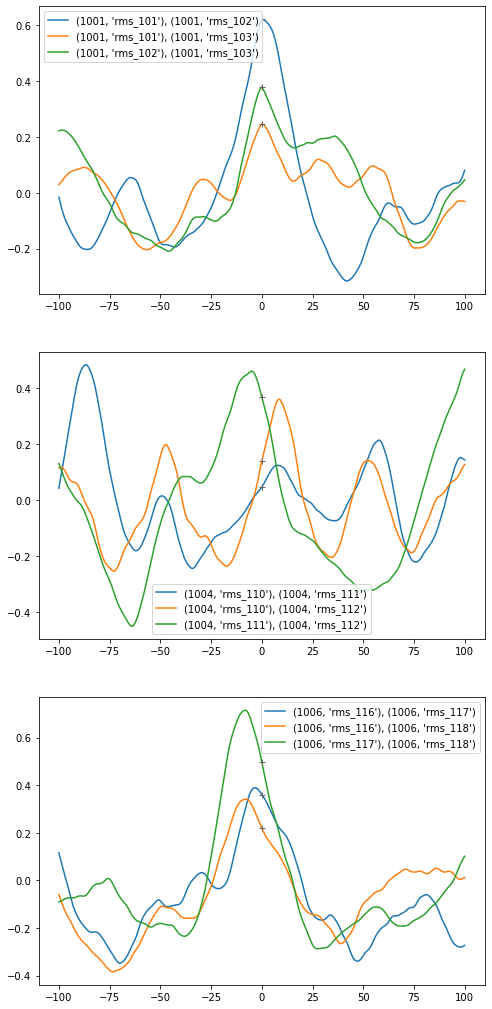

In [137]:
plot_crosscorr(df,signal_type="rms_",enum_start=0, same=True) 

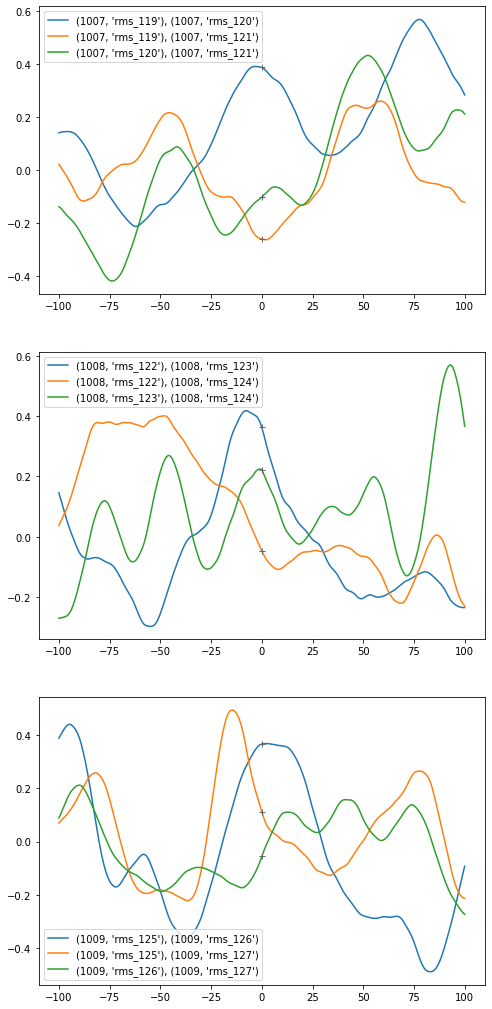

In [139]:
plot_crosscorr(df,signal_type="rms_",enum_start=9, same=True) 

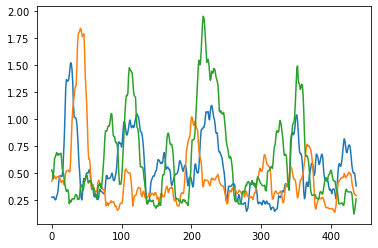

In [153]:
plt.plot(df[(1009,'rms_125')])
plt.plot(df[(1009,'rms_127')])
plt.plot(df[(1009,'rms_126')])


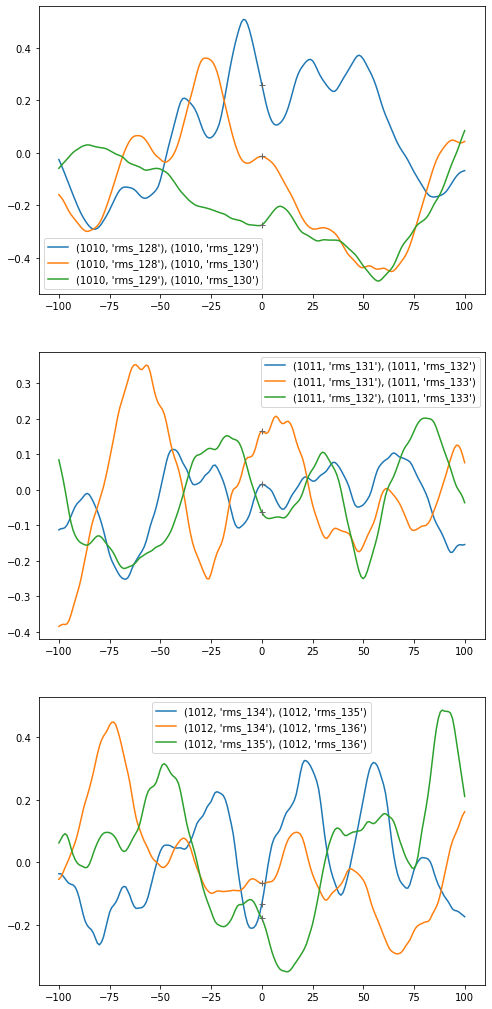

In [140]:
plot_crosscorr(df,signal_type="rms_",enum_start=18, same=True) 

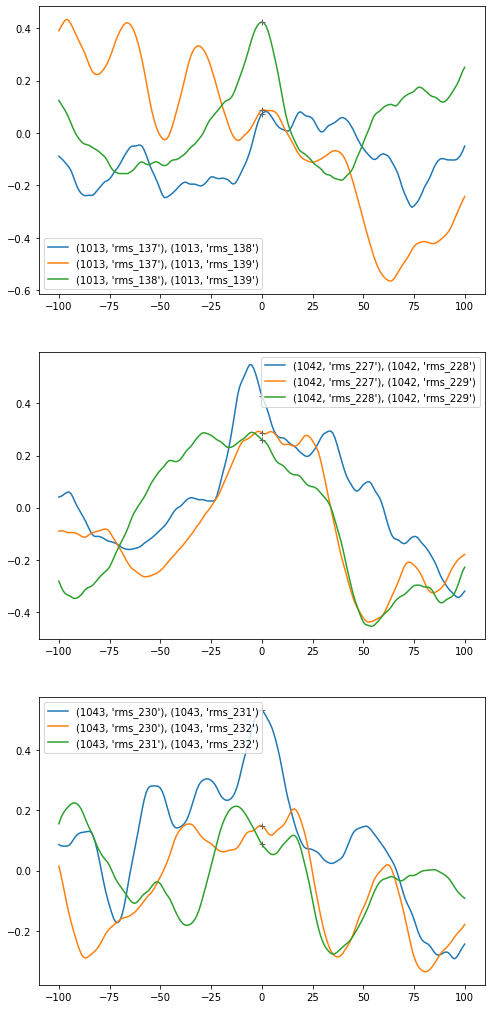

In [141]:
plot_crosscorr(df,signal_type="rms_",enum_start=27, same=True) 

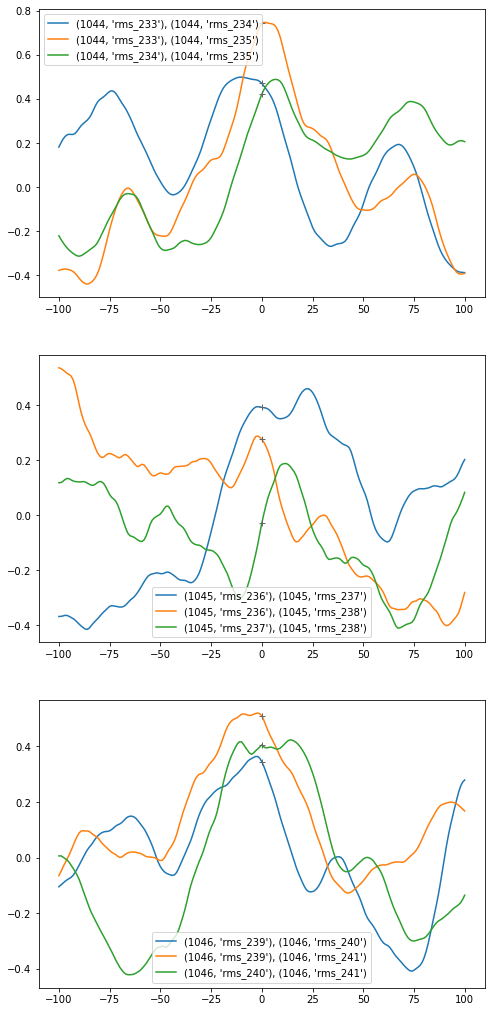

In [142]:
plot_crosscorr(df,signal_type="rms_",enum_start=36, same=True) 

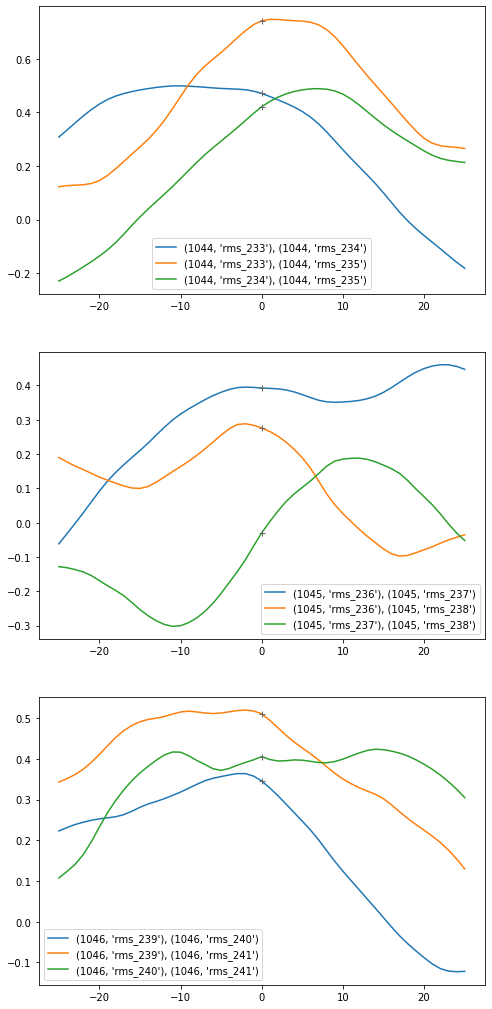

In [150]:
plot_crosscorr(df,signal_type="rms_",enum_start=36, same=True,window=25) 

## RMS, disjoint groups

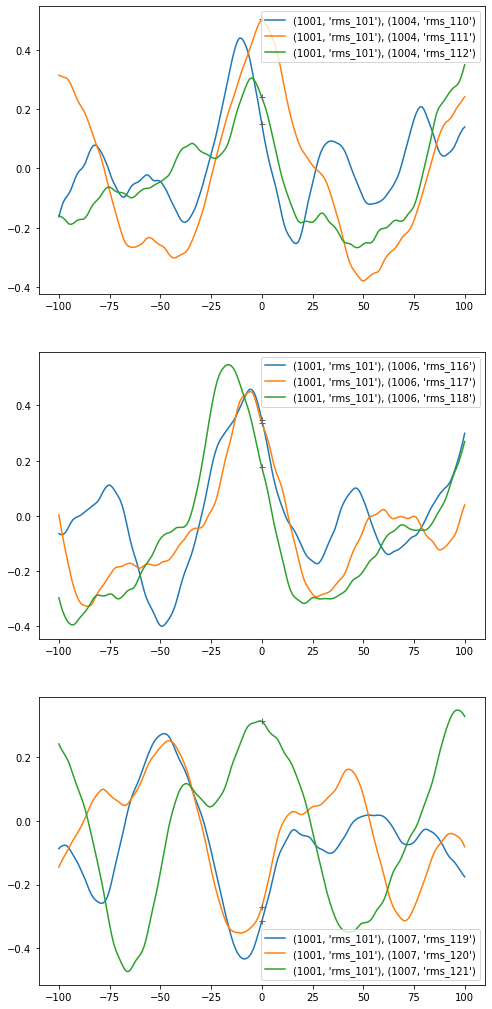

In [143]:
plot_crosscorr(df,signal_type="rms_",enum_start=0, same=False) 

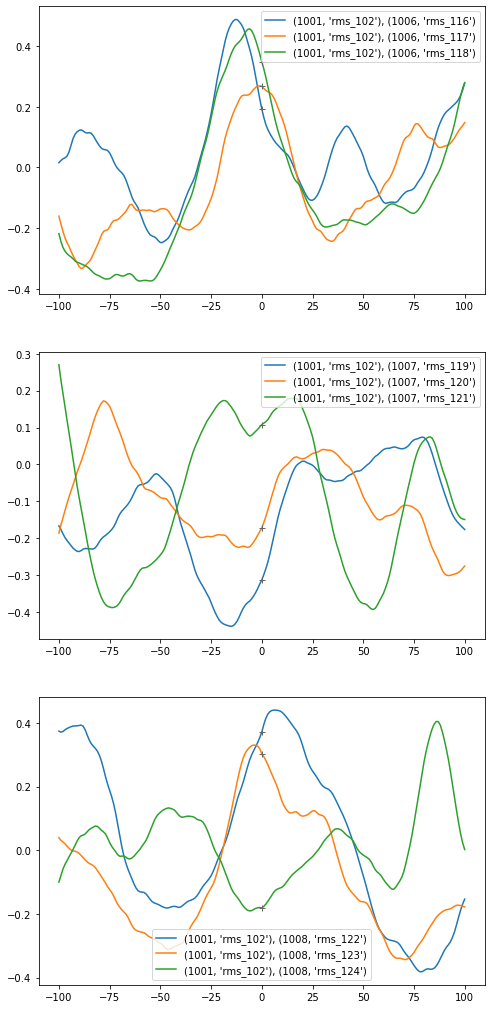

In [145]:
plot_crosscorr(df,signal_type="rms_",enum_start=60, same=False) 

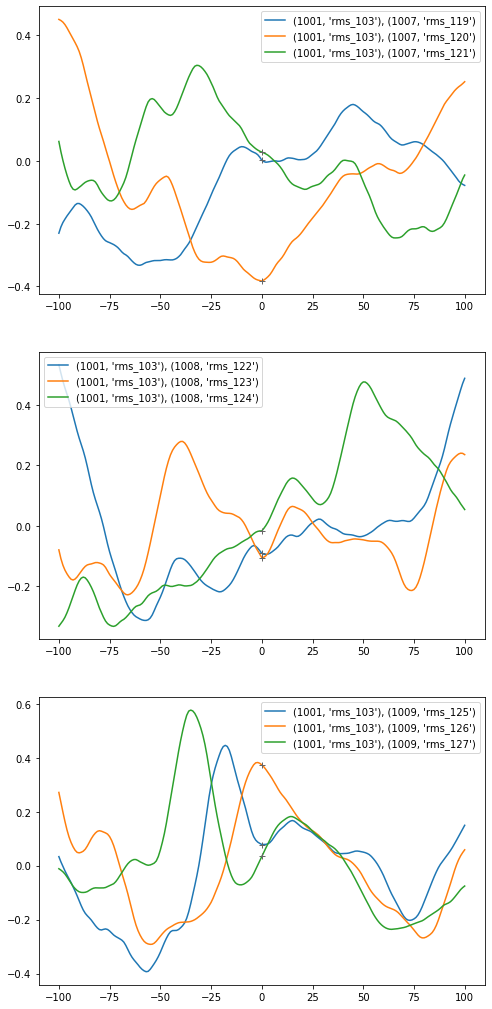

In [146]:
plot_crosscorr(df,signal_type="rms_",enum_start=120, same=False) 

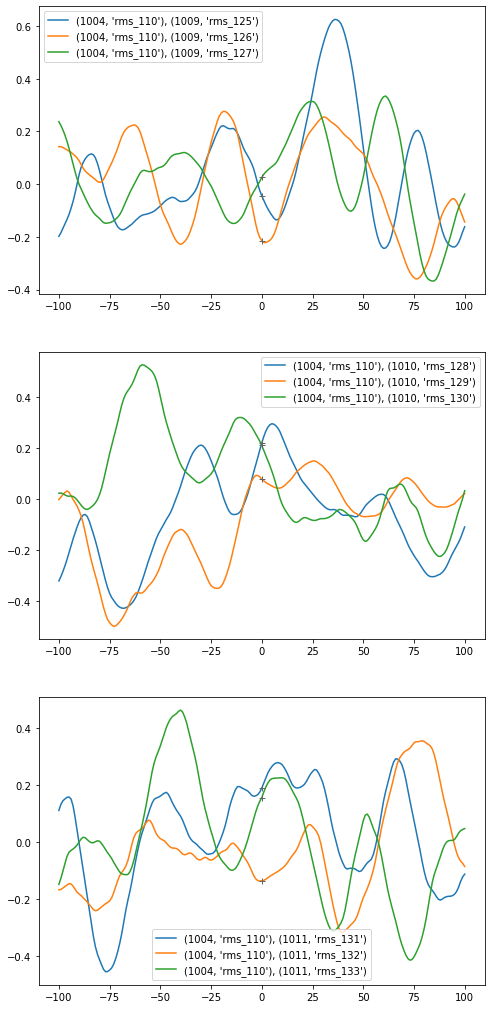

In [149]:
plot_crosscorr(df,signal_type="rms_",enum_start=180, same=False) 

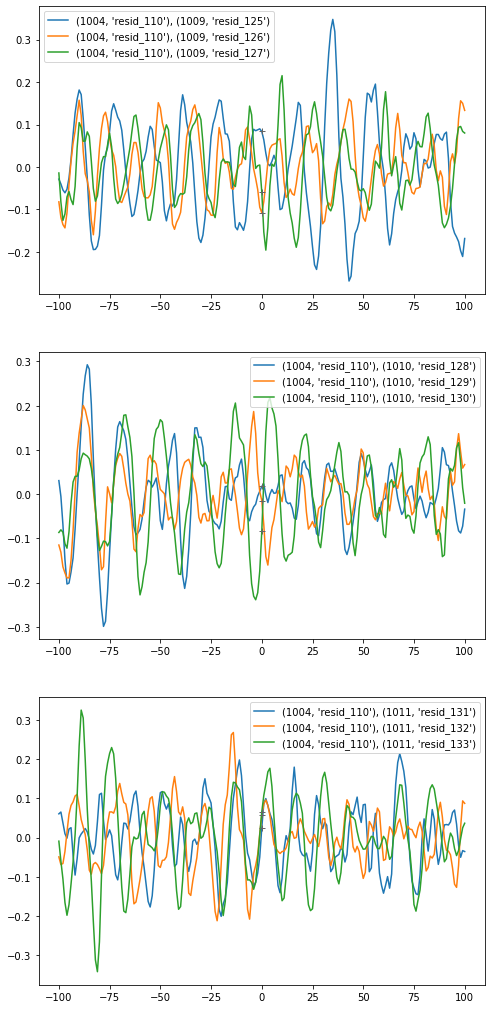

In [151]:
plot_crosscorr(df,signal_type="resid_",enum_start=180, same=False) 

In [ ]:
plot_crosscorr(df,signal_type="rms_",enum_start=180, same=False) 